In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
df = pd.read_csv('../Q4_data/retail.csv')
df.info()
df

C:\Users\Lee\miniconda3\envs\p5002\lib\site-packages\pandas\io\parsers\c_parser_wrapper.py:373: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common_type = np.find_common_type(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Transaction_id  1000000 non-null  object 
 1   Product_id      1000000 non-null  object 
 2   Description     995669 non-null   object 
 3   Quantity        1000000 non-null  float64
 4   Date            1000000 non-null  object 
 5   Price           1000000 non-null  float64
 6   Customer ID     774502 non-null   float64
dtypes: float64(3), object(4)
memory usage: 56.0+ MB


,Transaction_id,Product_id,Description,Quantity,Date,Price,Customer ID
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009/12/1 7:45,6.95,13085.0
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009/12/1 7:45,6.75,13085.0
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009/12/1 7:45,6.75,13085.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009/12/1 7:45,2.10,13085.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009/12/1 7:45,1.25,13085.0
...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
df.dropna(subset=['Transaction_id'], inplace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Transaction_id  1000000 non-null  object 
 1   Product_id      1000000 non-null  object 
 2   Description     995669 non-null   object 
 3   Quantity        1000000 non-null  float64
 4   Date            1000000 non-null  object 
 5   Price           1000000 non-null  float64
 6   Customer ID     774502 non-null   float64
dtypes: float64(3), object(4)
memory usage: 61.0+ MB


,Transaction_id,Product_id,Description,Quantity,Date,Price,Customer ID
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009/12/1 7:45,6.95,13085.0
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009/12/1 7:45,6.75,13085.0
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009/12/1 7:45,6.75,13085.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009/12/1 7:45,2.10,13085.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009/12/1 7:45,1.25,13085.0
...,...,...,...,...,...,...,...
999995,576840,82582,AREA PATROLLED METAL SIGN,2.0,2011/11/16 15:23,4.13,NaN
999996,576840,82583,HOT BATHS METAL SIGN,1.0,2011/11/16 15:23,4.13,NaN
999997,576840,82616B,FRAPPUCINO SCARF KNITTING KIT,2.0,2011/11/16 15:23,2.46,NaN
999998,576840,82616C,MIDNIGHT GLAMOUR SCARF KNITTING KIT,5.0,2011/11/16 15:23,2.46,NaN


# Visualizations and insights

In [33]:
def get_hour(date_string):
    time = date_string.split()[-1]  
    hour = time.split(':')[0]
    return hour

def get_year(date_string):
    time = date_string.split()[0]  
    year = time.split('/')[0]
    return year

def get_month(date_string):
    time = date_string.split()[0]  
    month = time.split('/')[1]
    return month

def get_day(date_string):
    time = date_string.split()[0]  
    day = time.split('/')[2]
    return day

df['hour'] = df['Date'].apply(get_hour)
df['year'] = df['Date'].apply(get_year)
df['month'] = df['Date'].apply(get_month)
df['day'] = df['Date'].apply(get_day)

### 1. Total sales volume per product per year

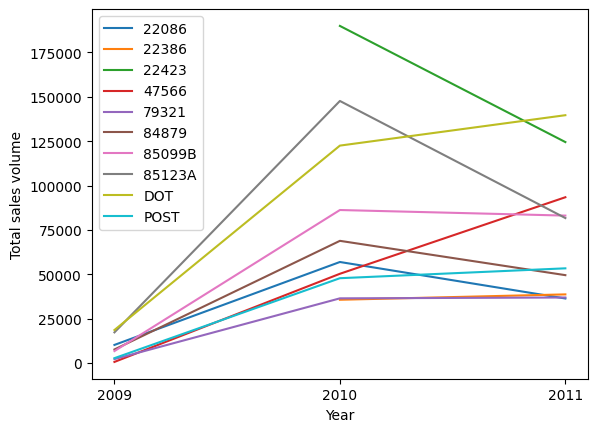

In [47]:
df['Sales_volume'] = df['Quantity'] * df['Price']

sales_volume = df.groupby(['Product_id', 'year'])['Sales_volume'].sum().reset_index()

# Calculate total sales volume for each product
total_sales_volume = df.groupby('Product_id')['Sales_volume'].sum()

# Get the top 10 products
top_10_products = total_sales_volume.nlargest(10).index

# Filter the sales_volume DataFrame to only include the top 10 products
top_10_sales_volume = sales_volume[sales_volume['Product_id'].isin(top_10_products)]

# Plot the data
fig, ax = plt.subplots()

for product_id in top_10_sales_volume['Product_id'].unique():
    product_data = top_10_sales_volume[top_10_sales_volume['Product_id'] == product_id]
    ax.plot(product_data['year'], product_data['Sales_volume'], label=product_id)

ax.set_xlabel('Year')
ax.set_ylabel('Total sales volume')
ax.legend()

plt.show()

### 2. The average spending per customer and the overall distribution

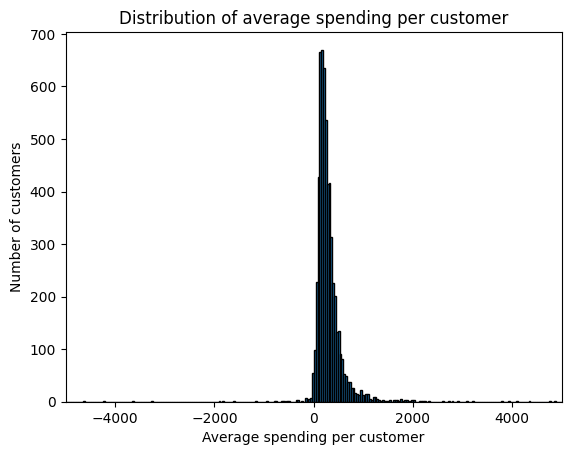

In [57]:
# Calculate total spending for each customer
df['Spending'] = df['Quantity'] * df['Price']
total_spending = df.groupby('Customer ID')['Spending'].sum()

# Calculate the number of transactions for each customer
num_transactions = df.groupby('Customer ID')['Transaction_id'].nunique()

# Calculate average spending
average_spending = total_spending / num_transactions


plt.hist(average_spending, bins=1000, edgecolor='black')
plt.xlabel('Average spending per customer')
plt.ylabel('Number of customers')
plt.title('Distribution of average spending per customer')
plt.xlim(-5000, 5000)
plt.show()

### 3. Sales pre hour

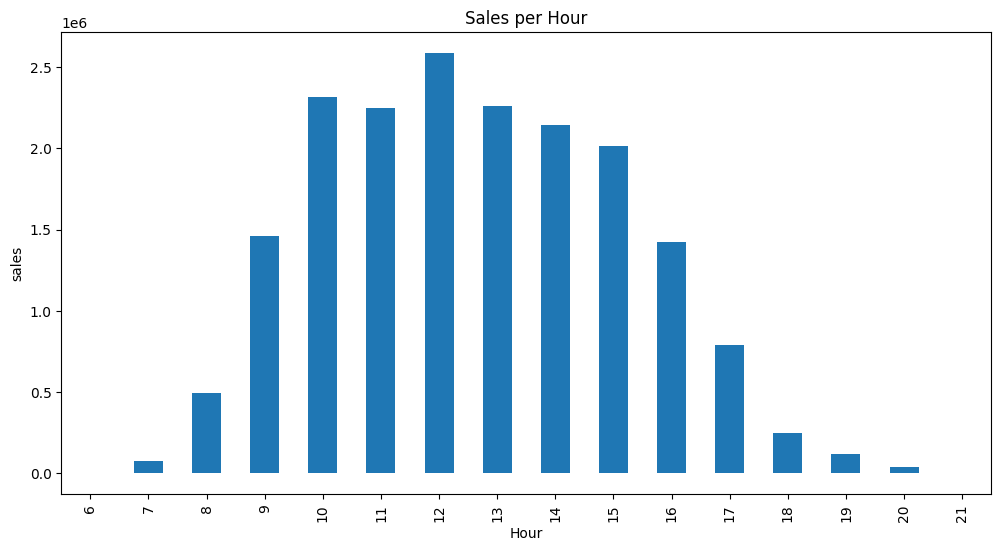

In [68]:
df['hour'] = df['hour'].astype(int)
total_spending = df.groupby('hour')['Spending'].sum()
total_spending.plot(kind='bar', figsize=(12,6))
plt.xlabel('Hour') 
plt.ylabel('sales') 
plt.title('Sales per Hour') 

plt.show()

### 4. Time series chart of transaction quantity

C:\Users\Lee\AppData\Local\Temp\ipykernel_29180\1499708349.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.resample('M').sum()['Quantity'].plot()


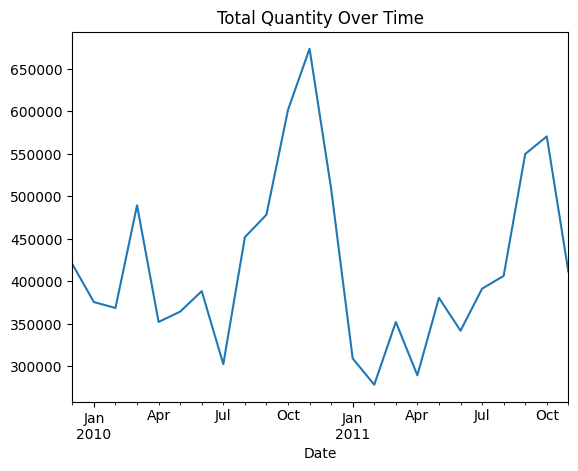

In [59]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.resample('M').sum()['Quantity'].plot()
plt.title('Total Quantity Over Time')
plt.show()

### 5.Time series chart of sales revenue

C:\Users\Lee\AppData\Local\Temp\ipykernel_29180\1970192263.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (df.resample('M').sum()['Quantity']*df.resample('M').mean()['Price']).plot()
C:\Users\Lee\AppData\Local\Temp\ipykernel_29180\1970192263.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (df.resample('M').sum()['Quantity']*df.resample('M').mean()['Price']).plot()


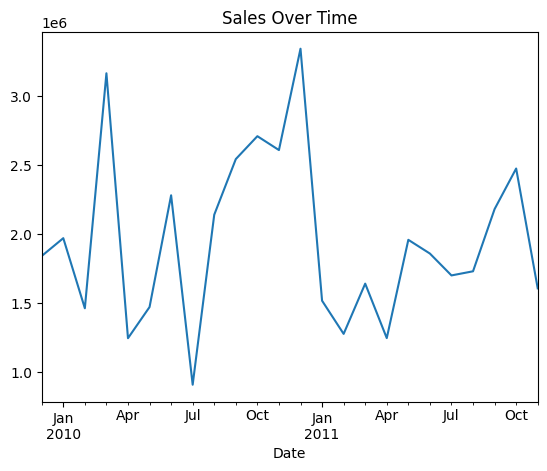

In [60]:
(df.resample('M').sum()['Quantity']*df.resample('M').mean()['Price']).plot()
plt.title('Sales Over Time')
plt.show()

### 6. Scatter plot of sales revenue and transaction quantity

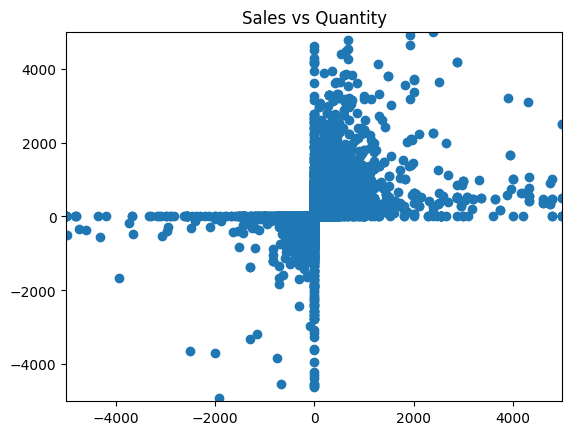

In [73]:
plt.scatter(df['Quantity'], df['Price']*df['Quantity'])
plt.title('Sales vs Quantity')
plt.xlim(-5000, 5000)
plt.ylim(-5000, 5000)
plt.show()

### 7. Distribution of unit price of goods

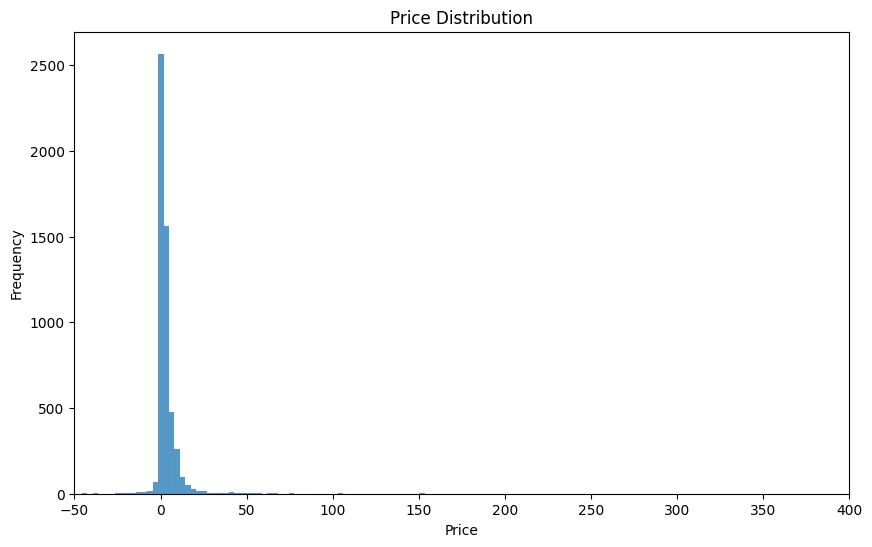

In [104]:
most_quantity = df.groupby('Product_id')['Quantity'].sum()
most_sales = df.groupby('Product_id')['Spending'].sum()
merged_df = pd.merge(most_quantity, most_sales, on='Product_id')
merged_df['single price'] = merged_df['Spending'] / merged_df['Quantity']
merged_df = merged_df[merged_df['Quantity'] != 0]
plt.figure(figsize=(10,6))
sns.histplot(merged_df['single price'],bins=10000, kde=False)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(-50,400)
plt.show()

### 8. Quantity of goods purchased per person per time

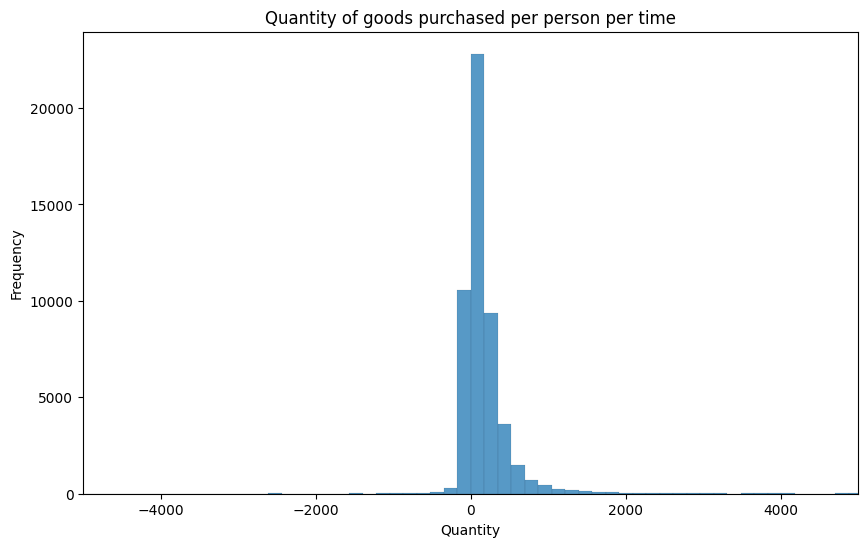

In [110]:
most_quantity = df.groupby('Transaction_id')['Quantity'].sum()
plt.figure(figsize=(10,6))
sns.histplot(most_quantity,bins=1000, kde=False)
plt.title('Quantity of goods purchased per person per time')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.xlim(-5000,5000)
plt.show()

### 9. Changes in daily transactions flow

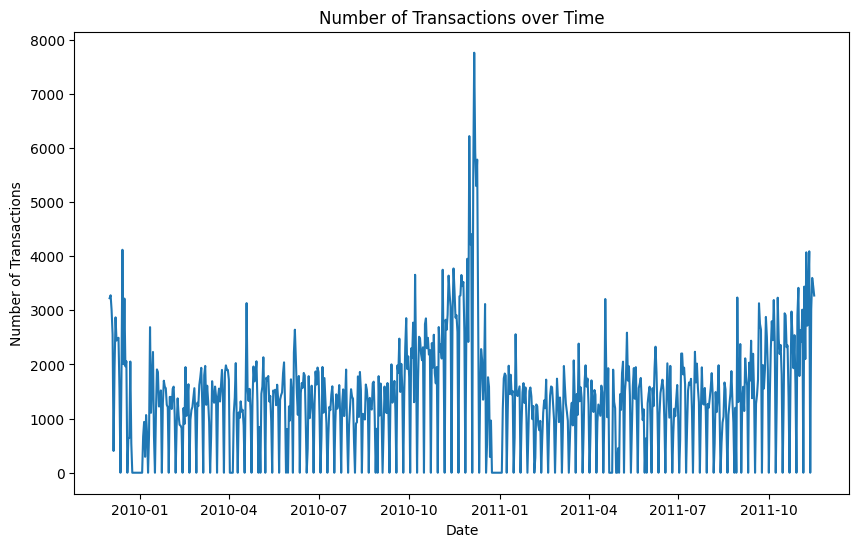

In [115]:
df_resampled = df.resample('D').count()

plt.figure(figsize=(10,6))
plt.plot(df_resampled['Transaction_id'])
plt.title('Number of Transactions over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

### 10. The distribution of customer visits

C:\Users\Lee\miniconda3\envs\p5002\lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


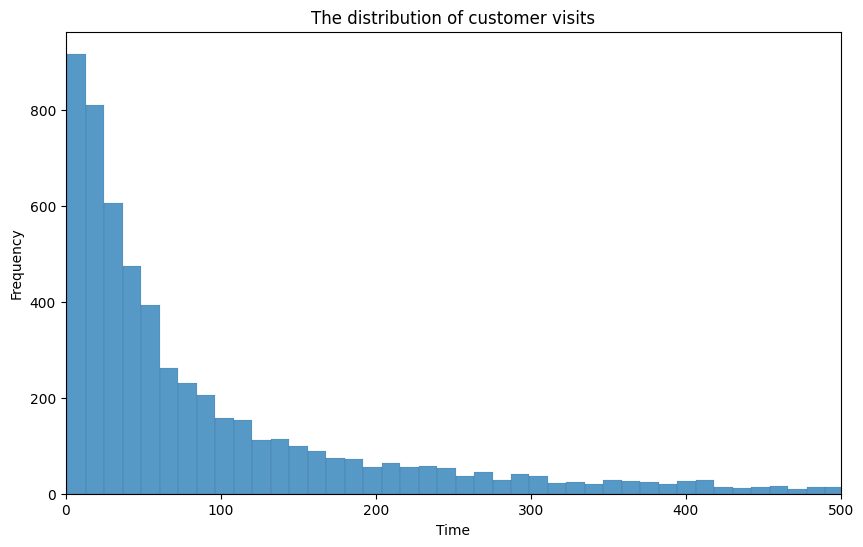

In [141]:
# Calculate the number of transactions for each customer
df_customer = df.groupby('Customer ID')['Transaction_id'].count()


plt.figure(figsize=(10,6))
sns.histplot(df_customer,bins=1000, kde=False)
plt.title('The distribution of customer visits')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.xlim(0,500)
plt.show()

# Association rule analysis

In [138]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

# Load data
df = pd.read_csv('../Q4_data/retail.csv')

# Data preprocessing: We need to convert the data into a format suitable for association rule analysis
df.dropna(subset=['Transaction_id'], inplace=True)
df = df[df['Quantity'] > 0]
df_grouped = df.groupby('Transaction_id')['Product_id'].agg(list).reset_index()
data=list(df_grouped['Product_id'])
d=TransactionEncoder()
d_data=d.fit(data).transform(data)
df=pd.DataFrame(d_data,columns=d.columns_)
# Calculate frequent itemsets
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
# Select the optimal association rule based on indicators such as lift, confidence, and support. The greater the improvement value, the better the association rule.
recommendations = rules.sort_values('lift', ascending=False).head(10)
recommendations

C:\Users\Lee\miniconda3\envs\p5002\lib\site-packages\pandas\io\parsers\c_parser_wrapper.py:373: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common_type = np.find_common_type(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
75,(22697),(22698),0.032099,0.024137,0.020207,0.629513,26.080777,0.019432,2.634003,0.993549
74,(22698),(22697),0.024137,0.032099,0.020207,0.837161,26.080777,0.019432,5.943906,0.985443
77,(22697),(22699),0.032099,0.033812,0.024490,0.762951,22.564485,0.023404,4.075905,0.987376
76,(22699),(22697),0.033812,0.032099,0.024490,0.724292,22.564485,0.023404,3.510604,0.989127
9,(20724),(22356),0.049080,0.038297,0.025775,0.525154,13.712738,0.023895,2.025295,0.974925
8,(22356),(20724),0.038297,0.049080,0.025775,0.673026,13.712738,0.023895,2.908245,0.963993
4,(20723),(20724),0.033333,0.049080,0.021542,0.646259,13.167351,0.019906,2.688177,0.955919
5,(20724),(20723),0.049080,0.033333,0.021542,0.438912,13.167351,0.019906,1.722842,0.971748
43,(21231),(21232),0.036080,0.059562,0.027060,0.750000,12.592005,0.024911,3.761754,0.955042
42,(21232),(21231),0.059562,0.036080,0.027060,0.454315,12.592005,0.024911,1.766440,0.978889
